## 1. Import Necessary libraries

In [27]:
import pandas as pd
from matplotlib import pyplot as plt

## 2. Import Dataset

In [9]:
footfalls_data = pd.read_csv('footfalls.csv')
footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


### To be forecasted

In [4]:
pd.read_csv('Predict_new.csv')

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


## 3. Data Understanding

In [5]:
footfalls_data.shape

(159, 17)

In [6]:
footfalls_data.isna().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

### Step 1 : Visualize the data

<AxesSubplot:>

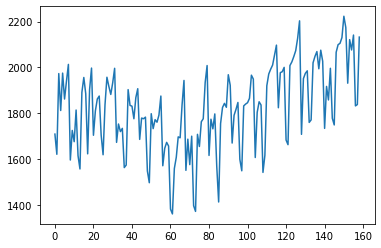

In [10]:
footfalls_data['Footfalls'].plot()

## Perform EDA

In [13]:
footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
footfalls_data["Date"] = pd.to_datetime(footfalls_data['Month'],format = '%b-%y')
footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [16]:
footfalls_data.dtypes

Month                    object
Footfalls                 int64
t                         int64
log_footfalls           float64
t_square                  int64
Jan                       int64
Feb                       int64
Mar                       int64
Apr                       int64
May                       int64
Jun                       int64
Jul                       int64
Aug                       int64
Sep                       int64
Oct                       int64
Nov                       int64
Dec                       int64
Date             datetime64[ns]
dtype: object

In [17]:
from datetime import datetime as dt

In [19]:
footfalls_data["month"] = footfalls_data['Date'].dt.strftime("%B")
footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,January
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,February
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,March
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,April
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,November
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,December
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,January
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,February


In [21]:
footfalls_data["year"] = footfalls_data['Date'].dt.strftime("%Y")
footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,January,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,February,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,March,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,April,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,November,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,December,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,January,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,February,2004


In [29]:
footfalls_pivot = pd.pivot_table(data = footfalls_data,values='Footfalls',index='year',columns='month').fillna(0)
footfalls_pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1991,1812.0,2013.0,1814.0,1621.0,1709.0,1940.0,1862.0,1973.0,1975.0,1676.0,1725.0,1596.0
1992,1956.0,1997.0,1875.0,1557.0,1615.0,1903.0,1623.0,1891.0,1885.0,1862.0,1810.0,1704.0
1993,1957.0,1996.0,1734.0,1619.0,1705.0,1933.0,1882.0,1837.0,1917.0,1720.0,1753.0,1673.0
1994,1834.0,1907.0,1783.0,1574.0,1563.0,1868.0,1776.0,1903.0,1831.0,1776.0,1779.0,1686.0
1995,1733.0,1875.0,1657.0,1497.0,1548.0,1792.0,1761.0,1798.0,1772.0,1673.0,1647.0,1571.0
1996,1608.0,1943.0,1700.0,1361.0,1382.0,1836.0,1693.0,1559.0,1697.0,1576.0,1687.0,1551.0
1997,1655.0,2008.0,1797.0,1372.0,1397.0,1934.0,1776.0,1708.0,1763.0,1732.0,1774.0,1616.0
1998,1825.0,1922.0,1847.0,1413.0,1570.0,1968.0,1826.0,1755.0,1843.0,1817.0,1791.0,1670.0
1999,1840.0,1949.0,1836.0,1549.0,1599.0,1966.0,1865.0,1832.0,1846.0,1850.0,1804.0,1607.0


<AxesSubplot:xlabel='month', ylabel='year'>

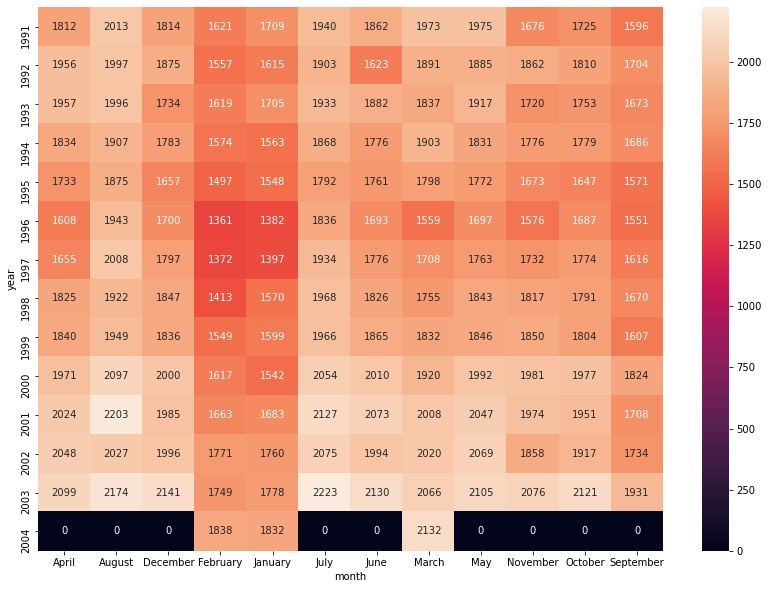

In [31]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(data = footfalls_pivot,annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Footfalls'>

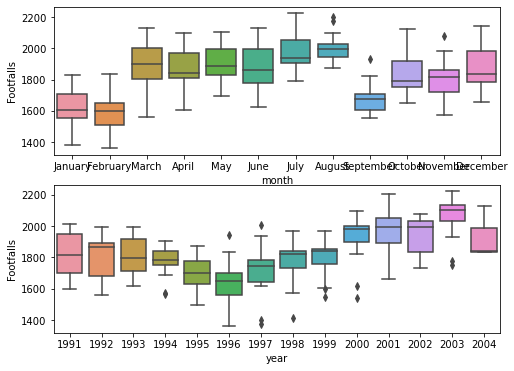

In [32]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.boxplot(x="month",y="Footfalls",data=footfalls_data)
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=footfalls_data)

Text(0.5, 1.0, 'Monthwise - Footfalls Counts')

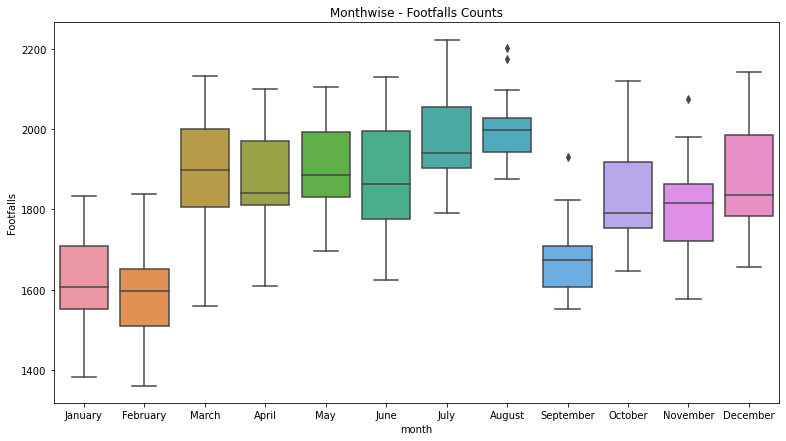

In [34]:
plt.figure(figsize=(13,7))
sns.boxplot(x="month",y="Footfalls",data=footfalls_data)
plt.title('Monthwise - Footfalls Counts')

Text(0.5, 1.0, 'Yearwise - Footfalls Counts')

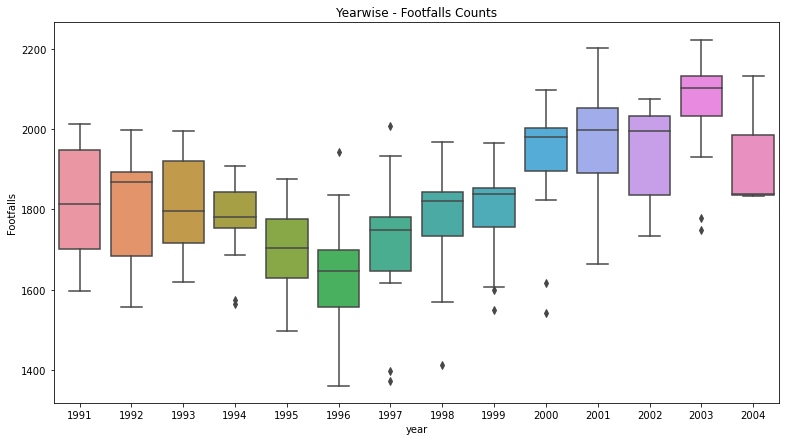

In [35]:
plt.figure(figsize=(13,7))
sns.boxplot(x="year",y="Footfalls",data=footfalls_data)
plt.title('Yearwise - Footfalls Counts')

<AxesSubplot:xlabel='year', ylabel='Footfalls'>

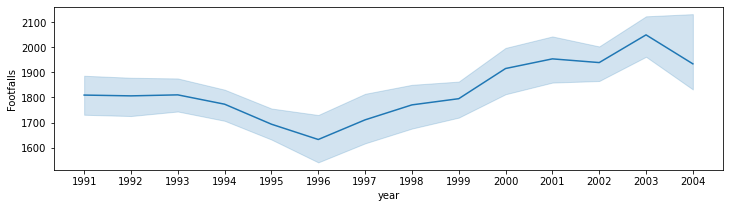

In [36]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=footfalls_data)

## 4. Model Building | Model Training | Model Testing

In [37]:
footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,January,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,February,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,March,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,April,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,November,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,December,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,January,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,February,2004


In [38]:
footfalls_data.shape

(159, 20)

In [40]:
train_data = footfalls_data.head(147)
test_data = footfalls_data.tail(12)

In [41]:
train_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,January,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,February,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,March,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,April,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,143,7.527256,20449,0,0,0,0,0,0,0,0,0,0,1,0,2002-11-01,November,2002
143,Dec-02,1996,144,7.598900,20736,0,0,0,0,0,0,0,0,0,0,0,1,2002-12-01,December,2002
144,Jan-03,1778,145,7.483244,21025,1,0,0,0,0,0,0,0,0,0,0,0,2003-01-01,January,2003
145,Feb-03,1749,146,7.466799,21316,0,1,0,0,0,0,0,0,0,0,0,0,2003-02-01,February,2003


In [42]:
test_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0,2003-04-01,April,2003
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0,2003-05-01,May,2003
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0,2003-06-01,June,2003
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0,2003-07-01,July,2003
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0,2003-08-01,August,2003
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0,2003-09-01,September,2003
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0,2003-10-01,October,2003
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,November,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,December,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,January,2004


In [44]:
#Linear Model
import statsmodels.formula.api as smf 
import numpy as np

#Training
linear_model = smf.ols('Footfalls~t',data=train_data).fit()

#Testing
pred_linear =  pd.Series(linear_model.predict(test_data['t']))

#Evaluation
rmse_linear = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [48]:
#Exponential Model
Exp = smf.ols('log_footfalls~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.05263569546594

In [49]:
#Quadratic 

Quad = smf.ols('Footfalls~t+t_square',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356473

In [57]:
#Additive seasonality 

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.66439005687846

In [58]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.607245841540774

In [60]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325266234

In [61]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033
0,rmse_linear,2062.950115


### Prediction

In [62]:
predict_data = pd.read_csv("Predict_new.csv")
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [63]:
#Build the model on entire data set
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=footfalls_data).fit()
model_full

In [64]:
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

0     2193.807626
1     2229.969736
2     2200.670308
3     2311.293957
4     2356.071452
5     2036.848947
6     2187.241826
7     2181.480859
8     2234.104508
9     1999.997498
10    1972.995363
11    2280.493228
dtype: float64

In [65]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2193.807626
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2229.969736
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2200.670308
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2311.293957
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2356.071452
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2036.848947
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2187.241826
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2181.480859
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2234.104508
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,1999.997498


In [67]:
new_var = pd.concat([footfalls_data,predict_data])
new_var

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year,forecasted_Footfalls
0,Jan-91,1709.0,1,7.443664,1,1,0,0,0,0,...,0,0,0,0,0,0,1991-01-01,January,1991,NaN
1,Feb-91,1621.0,2,7.390799,4,0,1,0,0,0,...,0,0,0,0,0,0,1991-02-01,February,1991,NaN
2,Mar-91,1973.0,3,7.587311,9,0,0,1,0,0,...,0,0,0,0,0,0,1991-03-01,March,1991,NaN
3,Apr-91,1812.0,4,7.502186,16,0,0,0,1,0,...,0,0,0,0,0,0,1991-04-01,April,1991,NaN
4,May-91,1975.0,5,7.588324,25,0,0,0,0,1,...,0,0,0,0,0,0,1991-05-01,May,1991,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,04-Nov,NaN,167,NaN,27889,0,0,0,0,0,...,0,0,0,0,1,0,NaT,NaN,NaN,2181.480859
8,04-Dec,NaN,168,NaN,28224,0,0,0,0,0,...,0,0,0,0,0,1,NaT,NaN,NaN,2234.104508
9,05-Jan,NaN,169,NaN,28561,1,0,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1999.997498
10,05-Feb,NaN,170,NaN,28900,0,1,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1972.995363


<AxesSubplot:>

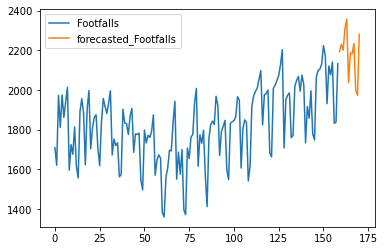

In [69]:
new_var[['Footfalls','forecasted_Footfalls']].reset_index(drop=True).plot()

## THE END!